In [1]:
#for tau mode

import numpy as np
from sympy import Symbol, integrate, sqrt, cos
import matplotlib.pyplot as plt

# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_b_0 = 1.519*10**(-12)

# Masses in GeV/c^2
#m_D = 1.86486
m_D_star= 2.01027
#m_B = 5.27955
m_B = 5.27925
m_b = 4.18
m_c = 1.275
#m_tau = 1.77686
m_e = 0.000511

r = m_D_star/m_B  #r=r_D_star



# Spacing and defining range
q_2 = np.linspace(m_e**2, (m_B - m_D_star)**2, 10000)



def D_gamma(q_2):
  lamda_D = m_B**4 + m_D_star**4 + q_2**2 - 2 * m_B**2 * m_D_star**2 - 2 * m_D_star**2 * q_2 - 2 * m_B**2 * q_2




  # constants infront of r's and h
  h_A1_1 = 0.906
  rho_2 = 1.207
  R_1_1 = 1.406
  R_2_1 = 0.853

  #w's and z's
  w = (m_B**2+m_D_star**2-q_2)/(2*m_B*m_D_star)
  z = (np.sqrt(w+1)-np.sqrt(2))/(np.sqrt(w+1)+np.sqrt(2))

  #R's
  R_1 = R_1_1-0.12*(w-1)+0.05*(w-1)**2
  R_2 = R_2_1+0.11*(w-1)-0.06*(w-1)**2
  R_3 = 1.22-0.052*(w-1)+0.026*(w-1)**2

     # Print intermediate results
  # print("q_2:", q_2)
  # print("lamda_D", lamda_D)
  # print("w:", w)
  # print("z:", z)
  # print("R_1:", R_1)
  # print("R_2:", R_2)
  # print("R_3:", R_3)
  # print("r:", r)
  #h factors
  h_A1 = h_A1_1*(1-8*rho_2*z+(53*rho_2-15)*z**2-(231*rho_2-91)*z**3)
  h_V = R_1*h_A1

#  print("h_A1:", h_A1)
#  print("h_V:", h_V )


#  print("h_A1:" , h_A1)
#  print("h_V: ", h_V)

  h_A2 = ((R_2-R_3)/(2*r))*h_A1
  h_A3 = ((R_2+R_3)/2)*h_A1

#  print("h_A2:", h_A2)
#  print("h_A3:", h_A3)

  alpha = 1/(2*(1+r**2-2*r*w))
  h_T1_0 = ((m_b-m_c)/(m_B-m_D_star))*(1-r)**2*(w+1)*h_A1
  h_T1_1 = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*(w-1)*h_V
  h_T1 = alpha*(h_T1_0 - h_T1_1)
#  h_T1 = (1/(2*(1+r**(2)-2*r*w)))*(((m_b-m_c)/(m_B-m_D_star))*(1-r)**(2)*(w+1)*h_A1-((m_b+m_c)/(m_B+m_D_star))*(1+r)**(2)*(w-1)*h_V)

#  print("h_T1:", h_T1)

  # beta =(1-r**2)*(w+1)*alpha
  # h_T2_0 = ((m_b-m_c)/(m_B-m_D_star))*h_A1
  # h_T2_1 = ((m_b+m_c)/(m_B+m_D_star))*h_V
  # h_T2 = beta*(h_T2_0 - h_T2_1)
  h_T2 = (((1-r**(2))*(w+1))/(2*(1+r**(2)-2*r*w)))*(((m_b-m_c)/(m_B-m_D_star)*h_A1)-(m_b+m_c)/(m_B+m_D_star)*h_V)


# h_T2 = (((1-r**(2))*(w+1))/(2*(1+r**(2)-2*r*w)))*((m_b-m_c)/(m_B-m_D_star)*h_A1-(m_b+m_c/m_B+m_D_star)*h_V)
#  print("h_T2:", h_T2)


  iota = alpha/(1+r)
  h_T3_0 = 2*((m_b-m_c)/(m_B-m_D_star))*r*(w+1)*h_A1
  h_T3_1 = ((m_b-m_c)/(m_B-m_D_star))*(1+r**2-2*r*w)*(h_A3 - r*h_A2)
  h_T3_2 = ((m_b+m_c)/(m_B+m_D_star))*(1+r)**2*h_V
  h_T3 = -iota*(h_T3_0 - h_T3_1 - h_T3_2)



#  h_T3 = (1/2*(1+r)*(1+r**(2)-2*r*w))*((2*((m_b-m_c)/(m_B-m_D_star)))*r*(w+1)*h_A1-((m_b-m_c)/(m_B-m_D_star))*(1+r**(2)-2*r*w)*(h_A3-r*h_A2)-((m_b+m_c)/(m_B+m_D_star))*(1+r)**(2)*h_V)

#  print("h_T3:", h_T3)



  sigma = 1/(2*(np.sqrt(m_B*m_D_star)))
  delta = (m_B+m_D_star)
  zeta = (m_B-m_D_star)

  #tensor matrix element
  T_1 = sigma*(delta*h_T1 - zeta*h_T2)
#  print("T_1:", T_1)

  T_2_0 = ((delta**2-q_2)/delta)*h_T1
  T_2_1 = ((zeta**2-q_2)/zeta)*h_T2
  T_2 = sigma*(T_2_0 - T_2_1)
#  print("T_2:", T_2)


  T_3_0 = zeta*h_T1
  T_3_1 = delta*h_T2
  T_3_2 = 2*((m_B**2-m_D_star**2)/m_B)*h_T3
  T_3 = sigma*(T_3_0 - T_3_1 - T_3_2)
#  print("T_3:", T_3)


#  T_1 = (1/2*np.sqrt(m_B*m_D_star))*((m_B+m_D_star)*h_T1-(m_B-m_D_star)*h_T2)
#  T_2 = (1/2*np.sqrt(m_B*m_D_star))*((((m_B+m_D_star)**2-q_2)/(m_B+m_D_star))*h_T1-(((m_B-m_D_star)**2-q_2)/(m_B-m_D_star))*h_T2)
#  T_3 = (1/2*np.sqrt(m_B*m_D_star))*((m_B-m_D_star)*h_T1-(m_B+m_D_star)*h_T2-2*((m_B**2-m_D_star**2)/m_B)*h_T3)

  #form_factor


  V = sigma*delta*h_V
#  print("V:", V)

  A_1 = sigma*((delta**2-q_2)/delta)*h_A1
#  print("A_1:", A_1)

  A_2 = delta*sigma*(h_A3 +(m_D_star/m_B)*h_A2)
#  print("A_2:", A_2)

  # A_0_0 = ((delta**2-q_2)/(2*m_D_star))*h_A1
  # A_0_1 = ((m_B**2 - m_D_star**2+q_2)/2*m_B)*h_A2
  # A_0_2 = ((m_B**2-m_D_star**2-q_2)/(2*m_D_star))*h_A3
  # A_0 = sigma*(A_0_0 - A_0_1 - A_0_2)


#  V = (m_B+m_D_star)/(2*np.sqrt(m_B*m_D_star))*h_V
#  A_1 = (((m_B+m_D_star)**2-q_2)/(2*(np.sqrt(m_B*m_D_star))*(m_B+m_D_star)))*h_A1
#  A_2 = ((m_B+m_D_star)/(2*np.sqrt(m_B*m_D_star)))*(h_A3+(m_D_star/m_B)*h_A2)
  A_0 = ((1/(2*np.sqrt(m_B*m_D_star)))*((((m_B+m_D_star)**2-q_2)/(2*m_D_star))*h_A1-((m_B**2-m_D_star**2+q_2)/(2*m_B))*h_A2-((m_B**2-m_D_star**2-q_2)/(2*m_D_star))*h_A3))
#  print("A_0:", A_0)
  #hadronic helicity amplitude

#  H_V_0_0 = (m_B**2-m_D_star**2-q_2)*A_1
#  H_V_0_1 = (lamda_D/(m_B+m_D_star)**2)*A_2
#  H_V_0 = ((m_B+m_D_star)/(2*m_D_star*np.sqrt(q_2)))*(-H_V_0_0 + H_V_0_1)

#  H_V_plus_0 = (m_B+m_D_star)*A_1
#  H_V_plus_1 = (np.sqrt(lamda_D)/(m_B+m_D_star))*V
#  H_V_plus = H_V_plus_0 - H_V_plus_1


#  H_V_minus = H_V_plus_0 + H_V_plus_1

#  H_V_t = -np.sqrt(lamda_D/q_2)*A_0

#  H_S = -(np.sqrt(lamda_D)/(m_b+m_c))*A_0

#  H_T_0_0 = (m_B**2+3*m_D_star**2-q_2)*T_2
#  H_T_0_1 = (lamda_D/(m_B**2-m_D_star**2))*T_3
#  H_T_0 = (1/2*m_D_star)*(-H_T_0_0 + H_T_0_1)

#  H_T_plus_0 = (m_B**2-m_D_star**2)*T_2
#  H_T_plus_1 = np.sqrt(lamda_D)*T_1
#  H_T_plus = (1/np.sqrt(q_2))*(H_T_plus_0 + H_T_plus_1)


#  H_T_minus = (1/np.sqrt(q_2))*(-H_T_plus_0 + H_T_plus_1)





  H_V_0 = ((m_B+m_D_star)/(2*m_D_star*np.sqrt(q_2)))*(-(m_B**2-m_D_star**2-q_2)*A_1+ (lamda_D/(m_B+m_D_star)**2)*A_2)
#  print("H_V_0:", H_V_0)

  H_V_plus = (m_B+m_D_star)*A_1-(np.sqrt(lamda_D)/(m_B+m_D_star))*V
#  print("H_V_plus:", H_V_plus)
  H_V_minus = (m_B+m_D_star)*A_1+(np.sqrt(lamda_D)/(m_B+m_D_star))*V
#  print("H_V_minus:", H_V_minus)
  H_V_t = -(np.sqrt(lamda_D/q_2))*A_0
#  print("H_V_t:", H_V_t)
  H_S = -(np.sqrt(lamda_D)/(m_b+m_c))*A_0
#  print("H_S:", H_S)
  H_T_0 = (1/(2*m_D_star))*(-(m_B**2+3*m_D_star**2-q_2)*T_2+(lamda_D/(m_B**2-m_D_star**2))*T_3)
#  print("H_T_0:", H_T_0)
  H_T_plus = (1/np.sqrt(q_2))*((m_B**2-m_D_star**2)*T_2+np.sqrt(lamda_D)*T_1)
#  print("H_T_plus:", H_T_plus)
  H_T_minus = (1/np.sqrt(q_2))*(-(m_B**2-m_D_star**2)*T_2+np.sqrt(lamda_D)*T_1)
#  print("H_T_minus:", H_T_minus)

  #wiloson's coefficents
  C_V_LL = 0
  C_V_RL = 0
  C_T_LL = 0
  C_T_LL = 0
  C_R_LL = 0
  C_V_RR = 0
  C_V_LR = 0
  C_S_LL = 0
  C_S_RL = 0
  C_S_RR = 0
  C_S_LR = 0
  C_T_RR = 0




  #transversity amplitude
  A_L_0 = H_V_0*(1+C_V_LL-C_V_RL)
  A_L_11 = (1/np.sqrt(2))*(H_V_plus+H_V_minus)*(1+C_V_LL-C_V_RL)
  A_L_90 = (1/np.sqrt(2))*(H_V_plus-H_V_minus)*(1+C_V_LL+C_V_RL)
  A_L_t = H_V_t*(1+C_V_LL-C_V_RL)
  A_L_P = H_S*(C_S_RL-C_S_LL)
  A_L_T0 = 2*H_T_0*C_T_LL
  A_L_T11 = np.sqrt(2)*(H_T_plus-H_T_minus)*C_T_LL
  A_L_T90 = np.sqrt(2)*(H_T_plus+H_T_minus)*C_T_LL
  A_R_T90 = np.sqrt(2)*(H_T_plus+H_T_minus)*C_R_LL
  A_R_0 = H_V_0*(C_V_LR-C_V_RR)
  A_R_11 = (1/np.sqrt(2))*(H_V_plus + H_V_minus)*(C_V_LR-C_V_RR)
  A_R_90 = (1/np.sqrt(2))*(H_V_plus-H_V_minus)*(C_V_LR+C_V_RR)
  A_R_t = H_V_t*(C_V_LR-C_V_RR)
  A_R_P = H_S*(C_S_RR-C_S_LR)
  A_R_T0 = -2*H_T_0*C_T_RR
  A_R_T11 = -np.sqrt(2)*(H_T_plus-H_T_minus)*C_T_RR

  #extra trans Amp
  A_L_tP = A_L_t+(np.sqrt(q_2)/m_e)*A_L_P
  A_R_tP = A_R_t+(np.sqrt(q_2)/m_e)*A_R_P


  # print("A_L_0:",A_L_0 )
  # print("A_L_11:",A_L_11 )
  # print("A_L_90:",A_L_90 )
  # print("A_L_t:",A_L_t )
  # print("A_L_P:",A_L_P )
  # print("A_L_T0:",A_L_T0 )
  # print("A_L_T11:",A_L_T11 )
  # print("A_L_T90:",A_L_T90 )
  # print("A_R_T90:",A_R_T90 )
  # print("A_R_0:",A_R_0 )
  # print("A_R_11:",A_R_11 )
  # print("A_R_90:",A_R_90 )
  # print("A_R_t:",A_R_t )
  # print("A_R_P:",A_R_P )
  # print("A_R_T0:",A_R_T0 )
  # print("A_R_T11:",A_R_T11 )

  # branching fraction from D_star to D-pi
  B = 1

  #N_F(factor)
  N_F = ((G_F**2*(abs(V_cb))**2)/(2**7*3*np.pi**3*m_B**3))*q_2*np.sqrt(lamda_D)*(1-(m_e**2/q_2))**2*B
#  print("N_F: ", N_F)


  #Angular coefficients
#  I_C_1 = N_F*(2*(1+(m_tau**2/q_2))*((abs(A_L_0))**2+4*(abs(A_L_T0))**2)-16*(m_tau/np.sqrt(q_2))*((abs(A_L_0*(np.conjugate(A_L_T0)))).real)+(4*m_tau**2/q_2)*(abs(A_L_tP))**2 + 2*(1+(m_tau**2/q_2))*((abs(A_R_0))**2+4*(abs(A_R_T0))**2)-16*(m_tau/np.sqrt(q_2))*((abs(A_R_0*(np.conjugate(A_R_T0)))).real)+(4*m_tau**2/q_2)*(abs(A_R_tP))**2 )
#  I_S_1 = N_F*(0.5*(3+(m_tau**2/q_2))*((abs(A_L_90))**2+(abs(A_L_11))**2) + 2*(1+(3*m_tau**2/q_2))*((abs(A_L_T90))**2+(abs(A_L_T11))**2) - (8*m_tau/np.sqrt(q_2))*((A_L_90*(np.conjugate(A_L_T90)))+A_L_11*(np.conjugate(A_L_T11))).real + 0.5*(3+(m_tau**2/q_2))*((abs(A_R_90))**2+(abs(A_R_11))**2) + 2*(1+(3*m_tau**2/q_2))*((abs(A_R_T90))**2+(abs(A_R_T11))**2) - (8*m_tau/np.sqrt(q_2))*((A_R_90*(np.conjugate(A_R_T90)))+A_R_11*(np.conjugate(A_R_T11))).real)
#  I_C_2 = -2*N_F*(1-m_tau**2/q_2)*((abs(A_L_0))**2-4*((abs(A_L_T0))**2) + (abs(A_R_0))**2-4*((abs(A_R_T0))**2))
#  I_S_2 = 0.5*N_F*(1-(m_tau**2/q_2))*((abs(A_L_90))**2+(abs(A_L_11))**2-4*((abs(A_L_T90))**2+(abs(A_L_T11))**2) + (abs(A_R_90))**2+(abs(A_R_11))**2-4*((abs(A_R_T90))**2+(abs(A_R_T11))**2))


  #angular coefficents breakup
#  I_C_1_L = N_F*(2*(1+(m_tau**2/q_2))*((abs(A_L_0))**2+4*((abs(A_L_T0)))**2)-((16*m_tau)/np.sqrt(q_2))*((A_L_0*np.conjugate(A_L_T0)).real) + ((4*m_tau**2)/q_2)*(abs(A_L_tP))**2)
#  I_C_1_R = N_F*(2*(1+(m_tau**2/q_2))*((abs(A_R_0))**2+4*((abs(A_R_T0)))**2)-((16*m_tau)/np.sqrt(q_2))*((A_R_0*np.conjugate(A_R_T0)).real) + ((4*m_tau**2)/q_2)*(abs(A_R_tP))**2)
#  I_C_1 = I_C_1_L + I_C_1_R

#  I_S_1_L = N_F*(0.5*(3+(m_tau**2/q_2))*((abs(A_L_90))**2+(abs(A_L_11))**2)+2*(1+(3*m_tau**2/q_2))*((abs(A_L_T90))**2+(abs(A_L_T11))**2) - 8*(m_tau/np.sqrt(q_2))*((A_L_90*np.conjugate(A_L_T90)+A_L_11*np.conjugate(A_L_T11)).real))
#  I_S_1_R = N_F*(0.5*(3+(m_tau**2/q_2))*((abs(A_R_90))**2+(abs(A_R_11))**2)+2*(1+(3*m_tau**2/q_2))*((abs(A_R_T90))**2+(abs(A_R_T11))**2) - 8*(m_tau/np.sqrt(q_2))*((A_R_90*np.conjugate(A_R_T90)+A_R_11*np.conjugate(A_R_T11)).real))
#  I_S_1 = I_S_1_L + I_S_1_R

  I_C_2_L = -2*N_F*(1-(m_e**2/q_2))*(((abs(A_L_0))**2-4*(abs(A_L_T0))**2))
  I_C_2_R = -2*N_F*(1-(m_e**2/q_2))*(((abs(A_R_0))**2-4*(abs(A_R_T0))**2))
  I_C_2 = I_C_2_L + I_C_2_R
#  print("I_C_2: ", I_C_2)

#  I_S_2_L = 0.5*N_F*(1-(m_tau**2/q_2))*((abs(A_L_90))**2+(abs(A_L_11))**2-4*(abs(A_L_T90))**2-4*(abs(A_L_T11))**2)
#  I_S_2_R = 0.5*N_F*(1-(m_tau**2/q_2))*((abs(A_R_90))**2+(abs(A_R_11))**2-4*(abs(A_R_T90))**2-4*(abs(A_R_T11))**2)
#  I_S_2 = I_S_2_L + I_S_2_R

  #angular Coefficents's breakup
  I_C_1_L_0 = 2*(1+(m_e**2/q_2))*((abs(A_L_0))**2 + 4*(abs(A_L_T0))**2)
  I_C_1_L_1 = 16*(m_e/np.sqrt(q_2))*((A_L_0*(np.conjugate(A_L_T0))).real)
  I_C_1_L_2 = 4*(m_e**2/q_2)*(abs(A_L_tP))**2

  I_C_1_R_0 = 2*(1+(m_e**2/q_2))*((abs(A_R_0))**2 + 4*(abs(A_R_T0))**2)
  I_C_1_R_1 = 16*(m_e/np.sqrt(q_2))*((A_R_0*(np.conjugate(A_R_T0))).real)
  I_C_1_R_2 = 4*(m_e**2/q_2)*(abs(A_R_tP))**2

  I_C_1 = N_F*(I_C_1_L_0 - I_C_1_L_1 + I_C_1_L_2 + I_C_1_R_0 - I_C_1_R_1 + I_C_1_R_2) # final I_C_1
#  print("I_C_1: ", I_C_1)


  I_S_1_L_0 = 0.5*(3+(m_e**2/q_2))*((abs(A_L_90))**2 + (abs(A_L_11))**2)
  I_S_1_L_1 = 2*(1+(3*m_e**2/q_2))*((abs(A_L_T90))**2 + (abs(A_L_T11))**2)
  I_S_1_L_2 = 8*(m_e/np.sqrt(q_2))*((A_L_90*(np.conjugate(A_L_T90)) + A_L_11*(np.conjugate(A_L_T11))).real)

  I_S_1_R_0 = 0.5*(3+(m_e**2/q_2))*((abs(A_R_90))**2 + (abs(A_R_11))**2)
  I_S_1_R_1 = 2*(1+(3*m_e**2/q_2))*((abs(A_R_T90))**2 + (abs(A_R_T11))**2)
  I_S_1_R_2 = 8*(m_e/np.sqrt(q_2))*((A_R_90*(np.conjugate(A_R_T90)) + A_R_11*(np.conjugate(A_R_T11))).real)

  I_S_1 = N_F*(I_S_1_L_0 + I_S_1_L_1 - I_S_1_L_2 + I_S_1_R_0 + I_S_1_R_1 - I_S_1_R_2 )  # final I_S_1
#  print("I_S_1: ", I_S_1)

#  I_C_2_L_0 = (abs(A_L_0))**2
#  I_C_2_L_1 = (abs(A_L_T0))**2

#  I_C_2_R_0 = (abs(A_R_0))**2
#  I_C_2_R_1 = (abs(A_R_T0))**2

#  I_C_2 = -2*N_F*(1-(m_tau**2/q_2))(I_C_2_L_0 - I_C_2_L_1 + I_C_2_R_0 - I_C_2_R_1)  #final I_C_2

  I_S_2_L_0 = (abs(A_L_90))**2 + (abs(A_L_11))**2
  I_S_2_L_1 = 4*((abs(A_L_T90))**2 + (abs(A_L_T11))**2)

  I_S_2_R_0 = (abs(A_R_90))**2 + (abs(A_R_11))**2
  I_S_2_R_1 = 4*((abs(A_R_T90))**2 + (abs(A_R_T11))**2)

  I_S_2 = (1/2)*N_F*(1-(m_e**2/q_2))*(I_S_2_L_0 - I_S_2_L_1 + I_S_2_R_0 - I_S_2_R_1) #final I_S_2
#  print("I_S_2: ", I_S_2)

  # d-gamma
  D_gamma = (1/4)*(3*I_C_1 + 6*I_S_1 - I_C_2 - 2*I_S_2)
#  print("D_gamma: ", D_gamma)
  return(D_gamma)
print(D_gamma(q_2))
#result_for_q_2_5 = D_gamma(5)

[0.00000000e+00 1.43280704e-15 1.43312565e-15 ... 8.74110241e-17
 6.18141291e-17 9.78593011e-23]


4.331797235023042e-13


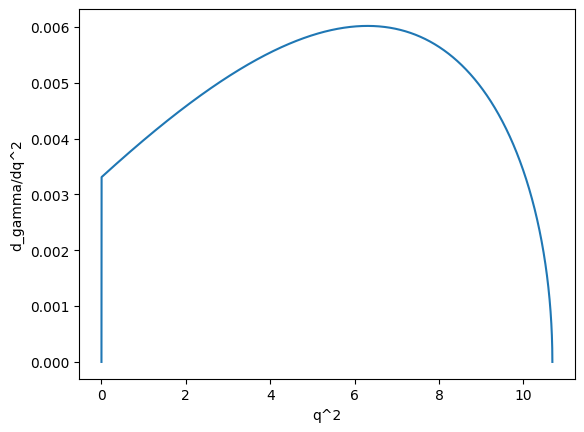

In [2]:
#plotting

tau_total = 6.58*10**(-25)/tau_b_0
print(tau_total)
# Calculate corresponding y values
#y = D_gamma(q_2)/tau_total
y= D_gamma(q_2)/tau_total
# Create the plot
plt.plot(q_2, y)
plt.xlabel('q^2')
plt.ylabel('d_gamma/dq^2')
#plt.legend()
#plt.grid(True)

# Show the plot
plt.show()


In [4]:
# Define the function D_gamma(q_2) and tau_total
def D_gamma_integrated(q_2):
    return D_gamma(q_2)

#def tau_total():
#    return 6.58*10**(-25)/tau_b_0

q_2_0 = float(m_e**2)
q_2_n = float((m_B - m_D_star)**2)
n = 999

# Simpson's rule integration
def integrated_D_gamma(x0, xn, n):
    h = (xn - x0) / n

    # Sum
#    integration = D_gamma(q_2_n) / tau_total() + D_gamma(q_2_0) / tau_total()
    integration = D_gamma(q_2_n) + D_gamma(q_2_0)
    for i in range(1, n):
        k = q_2_0 + i * h

        if i % 3 == 0:
#            integration += 2 * D_gamma(k) / tau_total()
            integration += 2 * D_gamma(k)
        else:
#            integration += 3 * D_gamma(k) / tau_total()
            integration += 3 * D_gamma(k)

    integration *= 3* h / 8

    return integration

result = integrated_D_gamma(q_2_0, q_2_n, n)
print(result)
D_B_R_emode = result/tau_total
print(D_B_R_emode)
#D_B_R_taumode = 0.00662716318692648

2.2849762882155033e-14
0.05274892069603874


In [7]:
print(0.013302509198773606/D_B_R_emode)

0.2521854290712071
